In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##### Reading the data

In [2]:
anime = pd.read_csv('F:/study/masters/3 sem/Ait-664/Project/anime.csv')

In [3]:
#head and shape of the data
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
np.shape(anime)

(12294, 7)

In [5]:
#number of null values in the data
anime.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

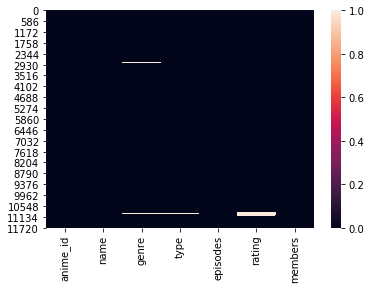

In [6]:
#heatmap of null values
sns.heatmap(anime.isnull())

In [7]:
#episodes has unkown in place of NA, replace it with null
anime['episodes'] = anime['episodes'].replace('Unknown',np.nan)
anime.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes    340
rating      230
members       0
dtype: int64

We see that there are 340 episodes that are unknown or null values

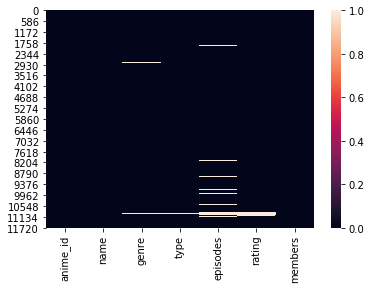

In [8]:
sns.heatmap(anime.isnull())

In [9]:
#Converting datatype of episodes from object to numeric
anime['episodes'] = pd.to_numeric(anime['episodes'])
anime['episodes'].dtype

#getting the correlation plot of columns having null values
anime.corr()

,anime_id,episodes,rating,members
anime_id,1.000000,-0.072945,-0.284625,-0.080071
episodes,-0.072945,1.000000,0.088761,0.056307
rating,-0.284625,0.088761,1.000000,0.387979
members,-0.080071,0.056307,0.387979,1.000000


In [10]:
#Since none of them are highly correlated drop the rows having null values
anime = anime.dropna()
anime.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [11]:
rating = pd.read_csv('F:/study/masters/3 sem/Ait-664/Project/rating.csv')

In [12]:
#Applying similar procedure to handle null values in rating
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [13]:
#-1 in rating indicates that users watched the show but didn't rate the show also rename rating column to rating of the user
rating.rename(columns={"rating":"User_rating"},inplace=True)
rating.head()

,user_id,anime_id,User_rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [14]:
rating['User_rating'] = rating['User_rating'].replace(-1,np.nan)
rating.head()

,user_id,anime_id,User_rating
0,1,20,NaN
1,1,24,NaN
2,1,79,NaN
3,1,226,NaN
4,1,241,NaN


In [15]:
rating.shape
rating.isna().sum()

user_id              0
anime_id             0
User_rating    1476496
dtype: int64

In [16]:
#drop the rows where users didnt give any ratings
rating = rating.dropna()
rating.shape

(6337241, 3)

In [17]:
rating.head()

,user_id,anime_id,User_rating
47,1,8074,10.0
81,1,11617,10.0
83,1,11757,10.0
101,1,15451,10.0
153,2,11771,10.0


#### Defining the definition of like by calculating mean of rating

In [18]:
mrpu = rating.groupby('user_id').mean().reset_index()
mrpu.drop('anime_id',axis=1,inplace=True)
mrpu.rename(columns={'User_rating':'Mean_rating'},inplace=True)
mrpu

,user_id,Mean_rating
0,1,10.000000
1,2,10.000000
2,3,7.565217
3,5,4.355120
4,7,7.387755
...,...,...
69595,73512,8.583333
69596,73513,7.515152
69597,73514,10.000000
69598,73515,8.547486


In [19]:
cpu = rating.groupby('user_id').count().reset_index()
cpu.drop('anime_id',axis=1,inplace=True)
cpu.rename(columns={'User_rating':'Num_mvs_rated'},inplace=True)
mrpu = pd.merge(mrpu,cpu,on=['user_id','user_id'])
mrpu

,user_id,Mean_rating,Num_mvs_rated
0,1,10.000000,4
1,2,10.000000,1
2,3,7.565217,92
3,5,4.355120,459
4,7,7.387755,343
...,...,...,...
69595,73512,8.583333,12
69596,73513,7.515152,33
69597,73514,10.000000,1
69598,73515,8.547486,179


In [20]:
rating = pd.merge(rating,mrpu,on=['user_id','user_id'])

In [21]:
rating.head(20)

,user_id,anime_id,User_rating,Mean_rating,Num_mvs_rated
0,1,8074,10.0,10.000000,4
1,1,11617,10.0,10.000000,4
2,1,11757,10.0,10.000000,4
3,1,15451,10.0,10.000000,4
4,2,11771,10.0,10.000000,1
5,3,20,8.0,7.565217,92
6,3,154,6.0,7.565217,92
7,3,170,9.0,7.565217,92
8,3,199,10.0,7.565217,92
9,3,225,9.0,7.565217,92


In [22]:
rating.shape

(6337241, 5)

In [23]:
#removing the shows the user didn't like and having num of movies rated <5
rating = rating.drop(rating[rating['User_rating']<rating['Mean_rating']].index)
rating.head(20)

,user_id,anime_id,User_rating,Mean_rating,Num_mvs_rated
0,1,8074,10.0,10.000000,4
1,1,11617,10.0,10.000000,4
2,1,11757,10.0,10.000000,4
3,1,15451,10.0,10.000000,4
4,2,11771,10.0,10.000000,1
5,3,20,8.0,7.565217,92
7,3,170,9.0,7.565217,92
8,3,199,10.0,7.565217,92
9,3,225,9.0,7.565217,92
14,3,813,10.0,7.565217,92


In [24]:
#combining the two datasets of anime and ratings
total_data = pd.merge(anime,rating,on=['anime_id','anime_id'])
total_data.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,User_rating,Mean_rating,Num_mvs_rated
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,152,10.0,7.760563,142
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,244,10.0,8.800000,275
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,271,10.0,7.372287,599
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,322,10.0,8.356322,87
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,398,10.0,8.000000,3


In [25]:
total_data.shape

(3381039, 11)

In [26]:
#Only 10000 user data is considered#
total_data = total_data[total_data['user_id']<=10000]
total_data.shape

(452566, 11)

In [27]:
total_data.drop('rating',axis=1,inplace=True)

In [28]:
total_data.shape

(452566, 10)

In [29]:
most_liked = total_data[['name','User_rating']]

Finding total users who gave ratings to the movie

In [30]:
temp = most_liked.groupby('name').count().reset_index()
temp = temp.rename(columns={"User_rating":"Num_ratingmvie"})
temp

,name,Num_ratingmvie
0,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,44
1,&quot;Bungaku Shoujo&quot; Memoire,54
2,&quot;Bungaku Shoujo&quot; Movie,90
3,.hack//G.U. Returner,22
4,.hack//G.U. Trilogy,55
...,...,...
6404,xxxHOLiC,432
6405,xxxHOLiC Kei,316
6406,xxxHOLiC Movie: Manatsu no Yoru no Yume,192
6407,xxxHOLiC Rou,115


Finding Average user rating given by the users per each movie

In [31]:
temp1 = most_liked.groupby('name').mean().reset_index()
temp1 = temp1.rename(columns={"User_rating":"Mean_rating_permovie"})
temp1

,name,Mean_rating_permovie
0,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,8.409091
1,&quot;Bungaku Shoujo&quot; Memoire,8.314815
2,&quot;Bungaku Shoujo&quot; Movie,8.555556
3,.hack//G.U. Returner,8.318182
4,.hack//G.U. Trilogy,8.563636
...,...,...
6404,xxxHOLiC,8.856481
6405,xxxHOLiC Kei,8.854430
6406,xxxHOLiC Movie: Manatsu no Yoru no Yume,8.666667
6407,xxxHOLiC Rou,8.704348


In [32]:
most_liked = pd.merge(temp,temp1,on=['name','name'])

In [33]:
most_liked

,name,Num_ratingmvie,Mean_rating_permovie
0,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,44,8.409091
1,&quot;Bungaku Shoujo&quot; Memoire,54,8.314815
2,&quot;Bungaku Shoujo&quot; Movie,90,8.555556
3,.hack//G.U. Returner,22,8.318182
4,.hack//G.U. Trilogy,55,8.563636
...,...,...,...
6404,xxxHOLiC,432,8.856481
6405,xxxHOLiC Kei,316,8.854430
6406,xxxHOLiC Movie: Manatsu no Yoru no Yume,192,8.666667
6407,xxxHOLiC Rou,115,8.704348


In [34]:
most_liked = most_liked.sort_values(['Num_ratingmvie','Mean_rating_permovie'],ascending=[False,False])

In [35]:
most_liked.iloc[:15,:]

,name,Num_ratingmvie,Mean_rating_permovie
1124,Death Note,3708,9.271575
5137,Shingeki no Kyojin,2901,9.189590
938,Code Geass: Hangyaku no Lelouch,2823,9.267446
1604,Fullmetal Alchemist: Brotherhood,2613,9.498661
942,Code Geass: Hangyaku no Lelouch R2,2609,9.378689
5482,Sword Art Online,2181,9.145805
1603,Fullmetal Alchemist,2143,9.006066
4992,Sen to Chihiro no Kamikakushi,2139,9.297335
239,Angel Beats!,2104,9.082224
5827,Toradora!,2067,9.051282


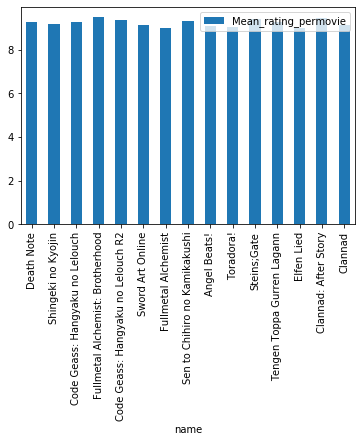

In [36]:
most_liked.iloc[:15,:].plot.bar(x='name',y='Mean_rating_permovie')

Type of show mostly liked

In [37]:
type_liked = total_data.groupby('type').count()['Num_mvs_rated'].reset_index()
type_liked = type_liked.rename(columns={'Num_mvs_rated':'Freq_of_animetype'})
type_liked

,type,Freq_of_animetype
0,Movie,65840
1,Music,1180
2,ONA,3812
3,OVA,35992
4,Special,25327
5,TV,320415


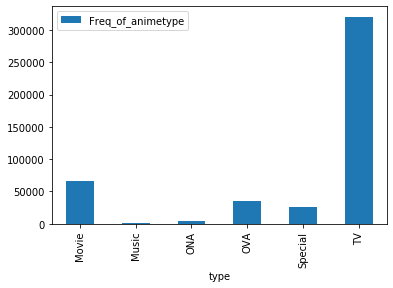

In [38]:
type_liked.plot.bar(x='type',y='Freq_of_animetype')

Therefore the most liked type of the anime show is TV and movies stand next to it, but they both have a huge margin.

#### Clustering

In [39]:
total_data.head()

,anime_id,name,genre,type,episodes,members,user_id,User_rating,Mean_rating,Num_mvs_rated
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,200630,152,10.0,7.760563,142
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,200630,244,10.0,8.800000,275
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,200630,271,10.0,7.372287,599
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,200630,322,10.0,8.356322,87
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,200630,398,10.0,8.000000,3


In [52]:
from sklearn.cluster import KMeans

squared_error = []
for i in range(2,10):
    cluster = KMeans(n_clusters=i)
    cluster.fit(total_data.iloc[:,[0,4,5,6,7,8,9]])
    squared_error.append(cluster.inertia_)

Text(0, 0.5, 'Squared error')

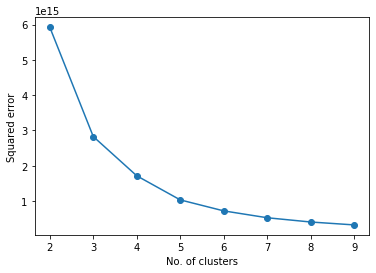

In [72]:
#Elbow curve
plt.plot(range(2,10),squared_error,'-o')
plt.xlabel('No. of clusters')
plt.ylabel('Squared error')

Therefore the optimal number of clusters are 5

In [74]:
best_model = KMeans(n_clusters=5)
best_model.fit(total_data.iloc[:,[0,4,5,6,7,8,9]])
best_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [76]:
predictions = best_model.predict(total_data.iloc[:,[0,4,5,6,7,8,9]])

In [77]:
total_data['cluster'] = predictions

In [85]:
total_data[total_data['cluster']==4]

,anime_id,name,genre,type,episodes,members,user_id,User_rating,Mean_rating,Num_mvs_rated,cluster
42507,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148.0,425855,7,9.0,7.387755,343,4
42508,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148.0,425855,38,10.0,6.703557,253,4
42509,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148.0,425855,41,10.0,8.670588,85,4
42510,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148.0,425855,50,10.0,7.944444,90,4
42511,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148.0,425855,71,10.0,8.876712,73,4
...,...,...,...,...,...,...,...,...,...,...,...
3335999,2476,School Days,"Drama, Harem, Romance, School",TV,12.0,279183,9487,8.0,7.881188,101,4
3336000,2476,School Days,"Drama, Harem, Romance, School",TV,12.0,279183,9727,8.0,7.629630,135,4
3336001,2476,School Days,"Drama, Harem, Romance, School",TV,12.0,279183,9750,9.0,7.747634,317,4
3336002,2476,School Days,"Drama, Harem, Romance, School",TV,12.0,279183,9856,8.0,7.126374,182,4


In [86]:
total_data.isna().sum()

anime_id         0
name             0
genre            0
type             0
episodes         0
members          0
user_id          0
User_rating      0
Mean_rating      0
Num_mvs_rated    0
cluster          0
dtype: int64

In [108]:
def clust_char(cluster):
    clus = total_data[total_data['cluster']==cluster-1]
    clus = clus.groupby('name').mean().reset_index()
    clus = clus.drop(['anime_id','user_id','Mean_rating','cluster'],axis=1)
    print('Cluster:',cluster)
    print('Average Episodes:',clus['episodes'].mean())
    print('Average members:',clus['members'].mean())
    print('Average User Rating:',clus['User_rating'].mean())
    print('Average Number of movies rated:',clus['Num_mvs_rated'].mean())

#### Characteristics of clusters

In [109]:
clust_char(1)

Cluster: 1
Average Episodes: 11.835646213007859
Average members: 18009.19127236248
Average User Rating: 8.524237469728568
Average Number of movies rated: 434.05417071397056


In [110]:
clust_char(2)

Cluster: 2
Average Episodes: 47.142857142857146
Average members: 582550.6071428572
Average User Rating: 9.033797074746781
Average Number of movies rated: 189.2201602528574


In [111]:
clust_char(3)

Cluster: 3
Average Episodes: 19.27777777777778
Average members: 179760.69607843139
Average User Rating: 8.775207414283406
Average Number of movies rated: 274.8660239011003


In [112]:
clust_char(4)

Cluster: 4
Average Episodes: 37.75
Average members: 899227.75
Average User Rating: 9.276407497460896
Average Number of movies rated: 148.13203068314704


In [113]:
clust_char(5)

Cluster: 5
Average Episodes: 27.233333333333334
Average members: 348414.8
Average User Rating: 8.911780119985925
Average Number of movies rated: 226.7026934057593


In [117]:
from wordcloud import WordCloud

def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=500, 
                      background_color=color, 
                      max_words=20,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)


    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

In [119]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split(','):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [120]:
set_keywords = set()
for liste_keywords in total_data['genre'].str.split(',').values:
    if isinstance(liste_keywords, float): continue  
    set_keywords = set_keywords.union(liste_keywords)

Favorite genre for these clusters

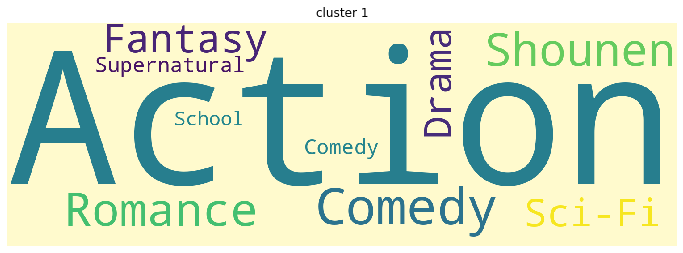

In [130]:
#cluster 1
keyword_occurences, dum = count_word(total_data[total_data['cluster']==0], 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 1","lemonchiffon")

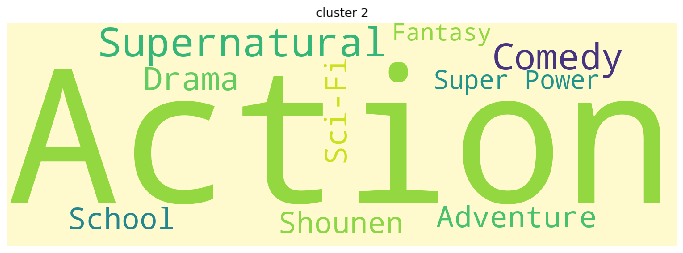

In [131]:
#cluster 2
keyword_occurences, dum = count_word(total_data[total_data['cluster']==1], 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 2","lemonchiffon")

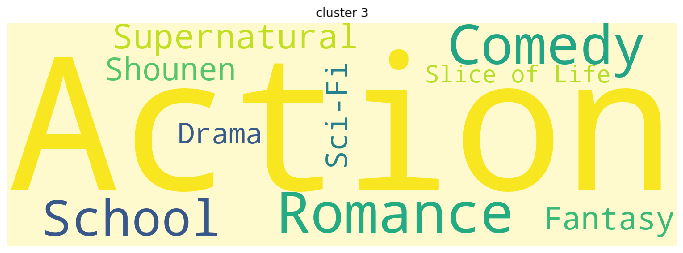

In [132]:
#cluster 3
keyword_occurences, dum = count_word(total_data[total_data['cluster']==2], 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 3","lemonchiffon")

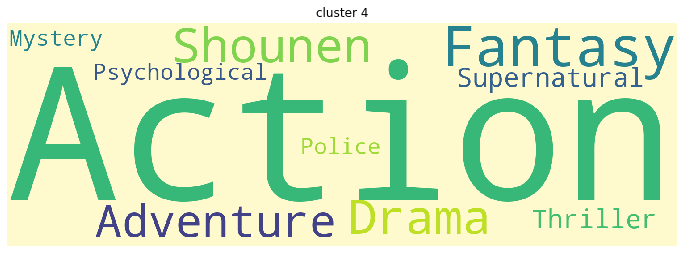

In [133]:
#cluster 4
keyword_occurences, dum = count_word(total_data[total_data['cluster']==3], 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 4","lemonchiffon")

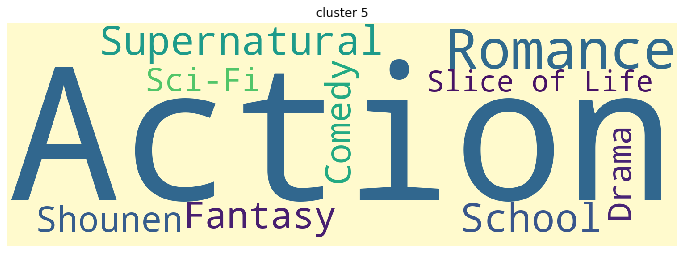

In [134]:
#cluster 5
keyword_occurences, dum = count_word(total_data[total_data['cluster']==4], 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 5","lemonchiffon")

Given the name of the show predicting some shows for recommending to the user

In [233]:
def predict_shows(show_name):
    cluster_num = total_data[total_data['name'] == show_name]['cluster'].unique()[0]
    avg_userrating = total_data[total_data['name'] == show_name]['User_rating'].mean()
    recom = total_data[total_data['cluster']==cluster_num]
    recom = recom[recom['name']!=show_name]
    recom = recom[(recom['User_rating']<avg_userrating+0.5) & (recom['User_rating']>=avg_userrating-0.5)] 
    recom = recom.groupby('name').mean().reset_index()
    recom = recom.drop(['anime_id','user_id','cluster'],axis=1)
    recom = recom.rename(columns={'User_rating':'Meanuserrating/anime','Mean_rating':'Avg(Mean_rating)/anime','Num_mvs_rated':'Avg(Num_mvs_rated)/anime'})
    recom = recom.sort_values(['Meanuserrating/anime','Avg(Mean_rating)/anime','Avg(Num_mvs_rated)/anime'],ascending=[False,True,False])
    print(recom['name'][0:15])

In [234]:
predict_shows('Death Note')

0    Fullmetal Alchemist: Brotherhood
1                  Shingeki no Kyojin
2                    Sword Art Online
Name: name, dtype: object


In [235]:
predict_shows('Hunter x Hunter (2011)')

30                          Gintama
59                         Mushishi
3                          Baccano!
14             Clannad: After Story
27             Fate/Zero 2nd Season
77                   Shinsekai yori
60                  NHK ni Youkoso!
56       Mahou Shoujo Madoka★Magica
25                             FLCL
74    Sen to Chihiro no Kamikakushi
58                    Mononoke Hime
62          Neon Genesis Evangelion
35                Hellsing Ultimate
76          Shigatsu wa Kimi no Uso
26                        Fate/Zero
Name: name, dtype: object


In [236]:
predict_shows('Cowboy Bebop')

22                           Steins;Gate
19                         One Punch Man
24            Tengen Toppa Gurren Lagann
8     Code Geass: Hangyaku no Lelouch R2
4                         Bakemonogatari
7        Code Geass: Hangyaku no Lelouch
14                          Kill la Kill
6                                Clannad
9                             Durarara!!
20                           Psycho-Pass
12                   Fullmetal Alchemist
26                             Toradora!
17                       No Game No Life
1                           Angel Beats!
11                            Fairy Tail
Name: name, dtype: object


In [238]:
predict_shows('Fullmetal Alchemist')

22                           Steins;Gate
9                           Cowboy Bebop
19                         One Punch Man
24            Tengen Toppa Gurren Lagann
8     Code Geass: Hangyaku no Lelouch R2
4                         Bakemonogatari
7        Code Geass: Hangyaku no Lelouch
14                          Kill la Kill
6                                Clannad
10                            Durarara!!
20                           Psycho-Pass
26                             Toradora!
17                       No Game No Life
1                           Angel Beats!
12                            Fairy Tail
Name: name, dtype: object


#### Rough Work

In [225]:
total_data[total_data['name']=='Death Note']['cluster'].unique()[0]

3

In [226]:
temp = total_data[total_data['name']=='Death Note']['User_rating'].mean()
temp

9.271574973031283

In [232]:
recom = total_data[total_data['cluster']==3]
recom = recom[recom['name']!='Death Note']
recom = recom[(recom['User_rating']<temp+0.5) & (recom['User_rating']>=temp-0.5)] 
recom = recom.groupby('name').mean().reset_index() 
recom = recom.drop(['anime_id','user_id','cluster'],axis=1)
recom = recom.rename(columns={'User_rating':'Meanuserrating/anime','Mean_rating':'Avg(Mean_rating)/anime','Num_mvs_rated':'Avg(Num_mvs_rated)/anime'})
recom = recom.sort_values(['Meanuserrating/anime','Avg(Mean_rating)/anime','Avg(Num_mvs_rated)/anime'],ascending=[False,True,False])
recom['name'][0:15]

0    Fullmetal Alchemist: Brotherhood
1                  Shingeki no Kyojin
2                    Sword Art Online
Name: name, dtype: object